 Visualize Activation Maps: Description: Visualize activation maps to understand which image regions activate CNN filters for emotion detection. 
 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model

- **cv2**: OpenCV library for image processing.
- **numpy**: Library for numerical operations, such as array manipulation.
- **matplotlib.pyplot**: Plotting library for visualization.
- **tensorflow.keras.models**: Provides functions to load models and create custom models.

In [ ]:

def load_model_and_weights(model_json_path, model_weights_path):
    with open(model_json_path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json)
    model.load_weights(model_weights_path)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

- **`model_json_path`**: Path to the JSON file containing the model architecture.
- **`model_weights_path`**: Path to the file containing pre-trained weights.
- **`model_from_json`**: Loads the model structure from the JSON file.
- **`load_weights`**: Loads the model weights.
- **`compile`**: Prepares the model for evaluation with an optimizer and loss function.



In [ ]:
def preprocess_image(img_path, target_size=(48, 48)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img_array = np.expand_dims(img, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array / 255.0
    return img, img_array


-**img_path**: Path to the image file. 

-**cv2.imread**: Reads the image in grayscale.

-**cv2.resize**: Resizes the image to the specified dimensions.

-**np.expand_dims**: Adds dimensions to match model input shape.

-**img_array / 255.0**: Normalizes the pixel values to [0, 1].

In [ ]:
def get_activations(model, layer_name, img_array):
    layer = model.get_layer(layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(img_array)
    return activations

-**layer_name**: Name of the layer for which activations are to be retrieved.

-**model.get_layer**: Retrieves the specified layer from the model.

-**Model**: Creates a new model to output activations from the specified layer.

-**activation_model.predict**: Predicts the activations for the given image.

In [ ]:
def plot_activations(activations, original_img, num_columns=8, save_path=None):
    num_filters = activations.shape[-1]
    num_rows = int(np.ceil(num_filters / num_columns))
    plt.figure(figsize=(num_columns * 3, num_rows * 3))
    
    # Plot original image for reference
    plt.subplot(num_rows + 1, num_columns, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    for i in range(num_filters):
        plt.subplot(num_rows + 1, num_columns, i + num_columns + 1)
        activation = activations[0, :, :, i]
        
        # Normalize activations
        activation = (activation - np.min(activation)) / (np.max(activation) - np.min(activation))
        
        plt.imshow(activation, cmap='jet', interpolation='nearest')
        plt.title(f'Filter {i + 1}')
        plt.axis('off')
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


-**num_columns**: Number of columns in the grid layout for plotting.

-**save_path**: Path to save the resulting plot image.

-**plt.subplot**: Creates a grid for plotting activation maps.

-**plt.imshow**: Displays activation maps with color mapping.

-**activation** = (activation - np.min(activation)) / (np.max(activation) - np.min(activation)): Normalizes activations for better visibility.

1/1 [==============================] - 0s 87ms/step


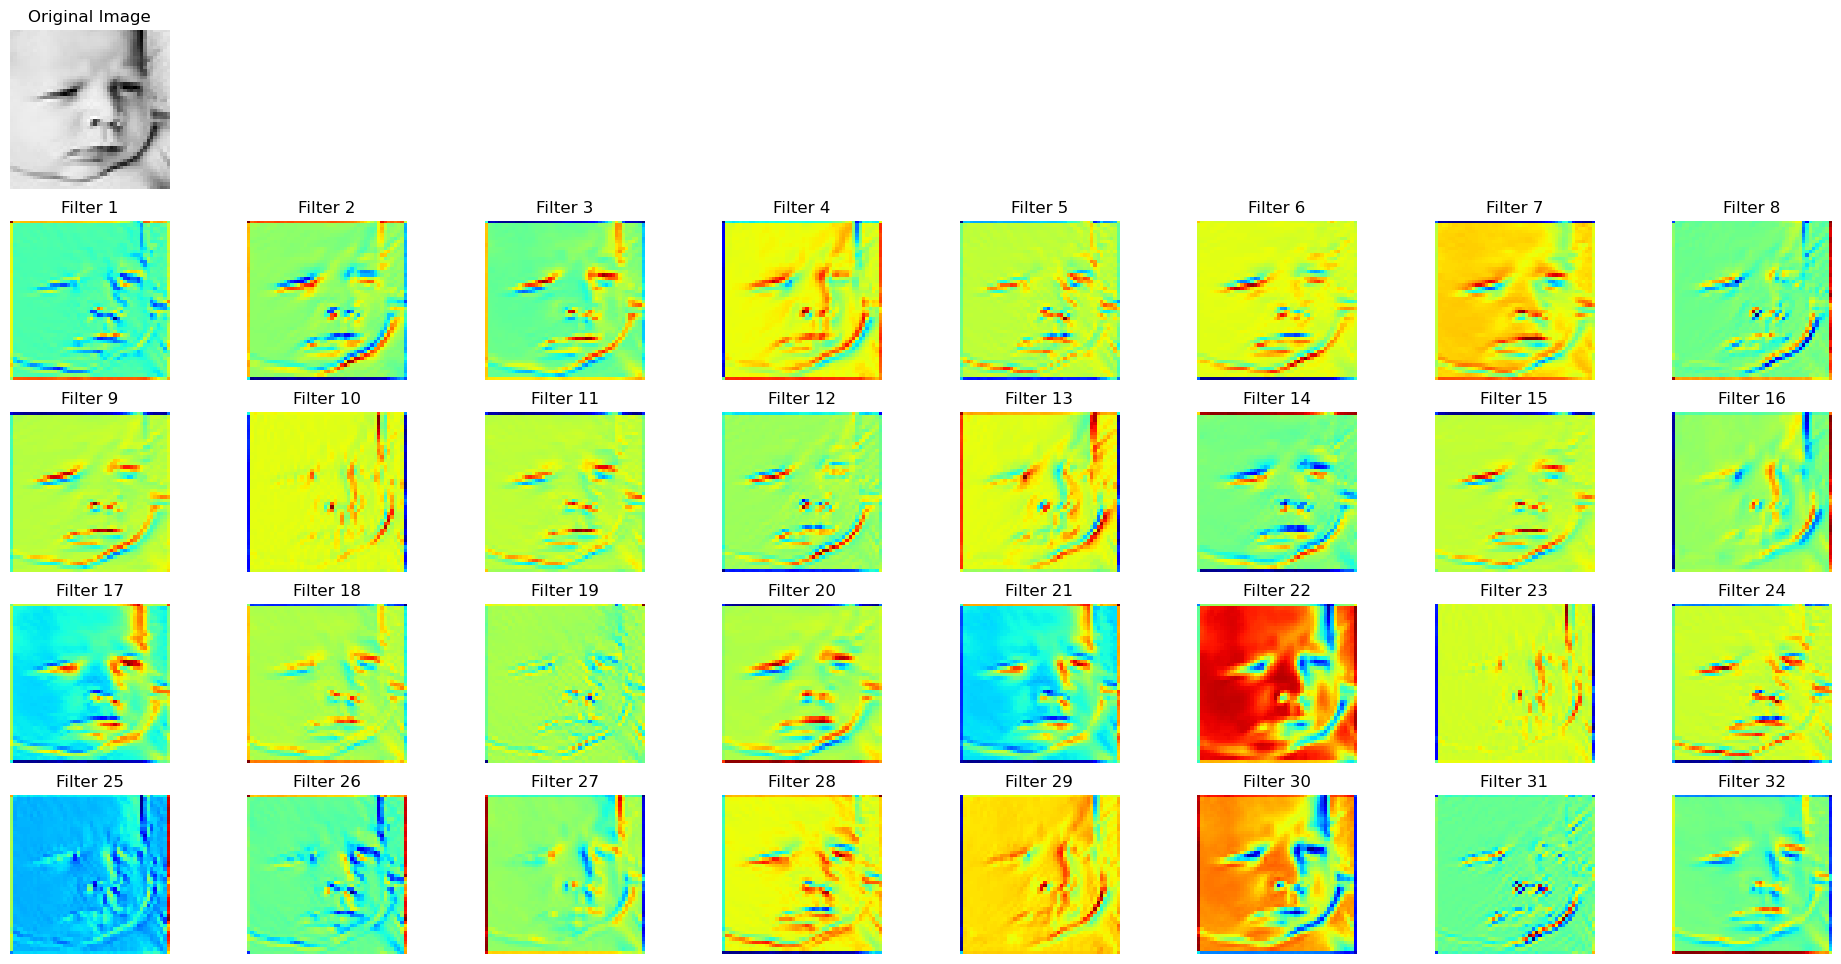

In [ ]:
def main():
    model_json_path = 'C:\\Users\\HP\\Desktop\\emotion_detection\\model_a.json'
    model_weights_path = 'C:\\Users\\HP\\Desktop\\emotion_detection\\model_weights.h5'
    img_path = 'C:\\Users\\HP\\Desktop\\emotion_detection\\test\\angry\\PrivateTest_88305.jpg'
    
    # Load the model and preprocess the image
    model = load_model_and_weights(model_json_path, model_weights_path)
    original_img, img_array = preprocess_image(img_path)
    
    # Specify the layer to visualize
    layer_name = 'conv2d'  # Update with the actual layer name
    activations = get_activations(model, layer_name, img_array)
    
    # Plot the activation maps with enhanced visualization
    plot_activations(activations, original_img, num_columns=8, save_path='activation_maps_unique.png')

if __name__ == '__main__':
    main()


-**model_json_path, model_weights_path, img_path**: Paths to the model files and the image to be processed.

-**load_model_and_weights**: Loads the model architecture and weights.

-**preprocess_image**: Prepares the image for model input.

-**get_activations**: Retrieves the activations from the specified layer.

-**plot_activations**: Visualizes the activation maps.

## Conclusion

In this script, we load a pre-trained Convolutional Neural Network (CNN) model from a JSON file and its corresponding weights file. We then preprocess an input image and use the model to obtain activations from a specified convolutional layer. The activations are visualized to understand which regions of the input image activate different filters in the CNN. This process helps in gaining insights into the feature extraction process of the model, which is crucial for understanding its behavior and performance.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tkinter import Tk, filedialog, messagebox

# Function to load the model architecture and weights
def load_model_and_weights(model_json_path, model_weights_path):
    with open(model_json_path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json)
    model.load_weights(model_weights_path)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to preprocess image
def preprocess_image(img_path, target_size=(48, 48)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img_array = np.expand_dims(img, axis=0)
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = img_array / 255.0
    return img, img_array

# Function to get activations from a specified layer
def get_activations(model, layer_name, img_array):
    layer = model.get_layer(layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(img_array)
    return activations

# Function to plot activation maps with enhanced visualization
def plot_activations(activations, original_img, num_columns=8, save_path=None):
    num_filters = activations.shape[-1]
    num_rows = int(np.ceil(num_filters / num_columns))
    plt.figure(figsize=(num_columns * 3, num_rows * 3))
    
    # Plot original image for reference
    plt.subplot(num_rows + 1, num_columns, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    for i in range(num_filters):
        plt.subplot(num_rows + 1, num_columns, i + num_columns + 1)
        activation = activations[0, :, :, i]
        
        # Normalize activations
        activation = (activation - np.min(activation)) / (np.max(activation) - np.min(activation))
        
        plt.imshow(activation, cmap='jet', interpolation='nearest')
        plt.title(f'Filter {i + 1}')
        plt.axis('off')
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Function to select an image file
def select_image():
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(title='Select Image', filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    return file_path

# Function to ask if user wants to process another image
def ask_to_continue():
    return messagebox.askyesno("Continue", "Do you want to detect another image?")

def main():
    model_json_path = 'C:\\Users\\HP\\Desktop\\emotion_detection\\model_a.json'
    model_weights_path = 'C:\\Users\\HP\\Desktop\\emotion_detection\\model_weights.h5'
    
    # Load the model
    model = load_model_and_weights(model_json_path, model_weights_path)
    
    while True:
        # Select an image file
        img_path = select_image()
        if not img_path:
            break  # Exit if no file is selected
        
        # Preprocess the selected image
        original_img, img_array = preprocess_image(img_path)
        
        # Specify the layer to visualize
        layer_name = 'conv2d'  # Update with the actual layer name
        activations = get_activations(model, layer_name, img_array)
        
        # Plot the activation maps with enhanced visualization
        plot_activations(activations, original_img, num_columns=8, save_path='activation_maps_unique.png')
        
        # Ask if the user wants to detect another image
        if not ask_to_continue():
            break  # Exit the loop if the user chooses not to continue

if __name__ == '__main__':
    main()






